In [1]:
import torch
import numpy as np 
import pytorch_tabnet 
import pandas 
import numpy
import plotly.express as px
import pytorch_lightning as pl 
import matplotlib.pyplot as plt 

import sys
sys.path.append('../src')

from models.lib.data import *
from models.lib.neural import *
from models.lib.lightning_train import *

/Users/julian/miniconda3/envs/single-cell/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = TabNetLightning.load_from_checkpoint(
    '../checkpoints/checkpoint-80-desc-retina.ckpt',
    input_dim=37475,
    output_dim=13,
    n_d=32,
    n_a=32,
    n_steps=10,
)

Initializing network
Initializing explain matrix


In [3]:
module = DataModule(
    datafiles=['../data/retina/retina_T.h5ad'],
    labelfiles=['../data/retina/retina_labels_numeric.csv'],
    class_label='class_label',
    index_col='cell',
    batch_size=16,
    num_workers=0,
    shuffle=True,
    drop_last=True,
    normalize=True,
    subset=list(range(5000))
)

module.setup()

Creating train/val/test DataLoaders...
Done, continuing to training.
Calculating weights


/Users/julian/miniconda3/envs/single-cell/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
pd.read_csv('../data/retina/retina_labels_numeric.csv')

,cell,index,Expressed Genes,UMI Count,Percent Mitochond.,BroadCellType,CellType,Donor,class_label
0,0,0024369980fd003553cbc9dfe29f7f95,2351,6060.0,4.125413,retinal rod cell,retinal rod cell type A,b8049daa-7458-47bf-8ec2-3f5c56d2cb34,9
1,2,0037f1b36684cb59b84d3585ca55ff69,950,1507.0,0.597213,retinal rod cell,retinal rod cell type B,427c0a62-9baf-42ab-a3a3-f48d10544280,10
2,3,00390952646f52d11a9ab9bba7d6ac51,961,1962.0,7.543323,retinal rod cell,retinal rod cell type A,b8049daa-7458-47bf-8ec2-3f5c56d2cb34,9
3,4,005b3351658380695a5dc46c384d72d7,858,1384.0,0.144509,retinal rod cell,retinal rod cell type B,b8049daa-7458-47bf-8ec2-3f5c56d2cb34,10
4,6,00906832f470fc434a52ac7d678a95bc,532,1054.0,6.451613,retinal rod cell,retinal rod cell type A,427c0a62-9baf-42ab-a3a3-f48d10544280,9
...,...,...,...,...,...,...,...,...,...
16441,19684,ff61c0c282f41e4a37885b05342441da,1494,3320.0,2.289157,retinal rod cell,retinal rod cell type B,427c0a62-9baf-42ab-a3a3-f48d10544280,10
16442,19689,ffa4633bef82949d2c6ac17b3ddf46e9,1813,4129.0,3.996125,retinal rod cell,retinal rod cell type A,b8049daa-7458-47bf-8ec2-3f5c56d2cb34,9
16443,19690,ffa5758b0600f47722fdc755444dfe0c,2692,8244.0,16.460457,retinal cone cell,retinal cone cell,b8049daa-7458-47bf-8ec2-3f5c56d2cb34,7
16444,19691,ffd3fd6119de767f3c3b8c47b2c28bf0,516,896.0,3.794643,retinal rod cell,retinal rod cell type A,427c0a62-9baf-42ab-a3a3-f48d10544280,9


In [5]:
importances = model.feature_importances(dataloader=module.trainloader)

In [55]:
module.trainloader

In [49]:
masks = mask[0]

idx = np.argwhere(np.all(masks[..., :] == 0, axis=0))
used = np.delete(masks, idx, axis=1)
used

array([[0.4444201 , 0.        , 0.        , ..., 0.        , 0.01767221,
        3.0080471 ],
       [0.42736042, 0.        , 0.        , ..., 0.        , 0.01767221,
        2.7512269 ],
       [0.63974345, 0.        , 0.        , ..., 2.01218677, 0.01767221,
        2.05097389],
       ...,
       [0.46560013, 0.        , 0.        , ..., 1.76228404, 0.01767221,
        2.12476206],
       [0.41882831, 0.47925878, 0.80639946, ..., 0.78866887, 0.        ,
        1.07521796],
       [0.41882831, 0.        , 0.        , ..., 2.11056995, 0.01767221,
        2.61167479]])

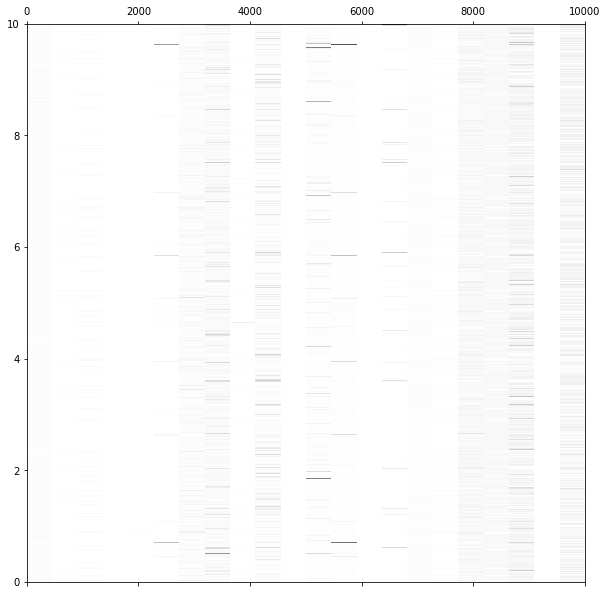

In [51]:
from matplotlib.pyplot import figure

plt.figure(figsize=(10, 10))
plt.matshow(used, extent = [0, 10000, 0, 10], aspect = 1000, fignum=1, cmap='Greys');

In [24]:
# px.imshow(mask[0]).show()